# CNN MNIST Classifier
Objective: build a convolutional neural network to classify MNIST handwritten digits dataset<br><br>
Based in Convolutional Neural Network Example
- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/ 

## MNIST Dataset Overview
The dataset contains 60,000 examples for training and 10,000 examples for testing. <br>The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1.<br> For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

In [5]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
# Training parameters
learning_rate = 0.001
num_steps = 2000
batch_size = 128

# Network parameters
num_input = 784
num_classes = 10
dropout = 0.25

In [0]:
# Create the neural network
def conv_net(x_dict, n_classes, dropout, reuse, is_training):
  
  with tf.variable_scope('ConvNet', reuse = reuse):
    x = x_dict['images']
    
    x = tf.reshape(x, shape = [-1, 28, 28, 1])
    
    # layer 1
    conv1 = tf.layers.conv2d(x, 32, 5, activation = tf.nn.relu)
    conv1 = tf.layers.max_pooling2d(conv1, 2, 2)
    
    # layer 2
    conv2 = tf.layers.conv2d(conv1, 64, 3, activation = tf.nn.relu)
    conv2 = tf.layers.max_pooling2d(conv2, 2, 2)
    
    # Flatten the data
    fc1 = tf.contrib.layers.flatten(conv2)
    
    # Fully connected layer
    fc1 = tf.layers.dense(fc1, 1024)
    fc1 = tf.layers.dropout(fc1, rate = dropout, training = is_training)
    
    # Output layer
    out = tf.layers.dense(fc1, n_classes)
    
  return out

In [0]:
# define the model function
def model_fn(features, labels, mode):
  
  # building the neural network
  logits_train = conv_net(features, num_classes, dropout, reuse = False, is_training = True)
  logits_test = conv_net(features, num_classes, dropout, reuse = True, is_training = False)
  
  # predictions
  pred_classes = tf.argmax(logits_test, axis = 1)
  pred_probas = tf.nn.softmax(logits_test)
  
  # if prediction mode, early return
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode, predictions = pred_classes)
  
  # define loss and optimizer
  loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
  logits = logits_train, labels = tf.cast(labels, dtype = tf.int32)))
  optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
  train_op = optimizer.minimize(loss_op, global_step = tf.train.get_global_step())
  
  # accuracy of the model
  acc_op = tf.metrics.accuracy(labels = labels, predictions = pred_classes)
  
  estim_specs = tf.estimator.EstimatorSpec(
  mode = mode, 
  predictions = pred_classes, 
  loss = loss_op, 
  train_op = train_op, 
  eval_metric_ops = {'accuracy': acc_op})
  
  return estim_specs

In [28]:
# Build the estimator
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8pvwmsz5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9bccc2d748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [29]:
import time
start_time = time.time()

# define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
x = {'images': mnist.train.images}, y = mnist.train.labels, 
batch_size = batch_size, num_epochs = None, shuffle = True)

# train the model
model.train(input_fn, steps = num_steps)

elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp8pvwmsz5/model.ckpt.
INFO:tensorflow:loss = 2.3196383, step = 1
INFO:tensorflow:global_step/sec: 89.3053
INFO:tensorflow:loss = 0.095810905, step = 101 (1.129 sec)
INFO:tensorflow:global_step/sec: 99.6014
INFO:tensorflow:loss = 0.10596167, step = 201 (1.001 sec)
INFO:tensorflow:global_step/sec: 100.169
INFO:tensorflow:loss = 0.123040825, step = 301 (0.998 sec)
INFO:tensorflow:global_step/sec: 99.4795
INFO:tensorflow:loss = 0.08768299, step = 401 (1.006 sec)
INFO:tensorflow:global_step/sec: 99.7819
INFO:tensorflow:loss = 0.06341663, step = 501 (1.004 sec)
INFO:tensorflow:global_step/sec: 99.0083
INFO:tensorflow:loss = 0.0129051125, step = 601 (1.010 sec)
INFO:tensorflow:global_step/sec: 99.749
INFO:te

'00:00:21'

In [30]:
# Evaluate the model
input_fn = tf.estimator.inputs.numpy_input_fn(
x = {'images': mnist.test.images}, y = mnist.test.labels,
batch_size = batch_size, shuffle = False)

# use the estimator 'evalate' method
model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-31-02:33:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8pvwmsz5/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-31-02:33:28
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.9887, global_step = 2000, loss = 0.03573818


{'accuracy': 0.9887, 'global_step': 2000, 'loss': 0.03573818}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8pvwmsz5/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


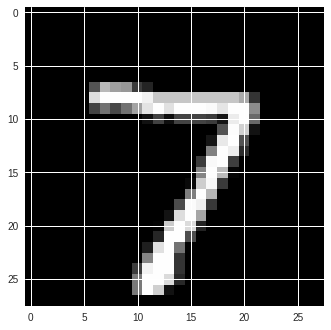

Model prediction: 7


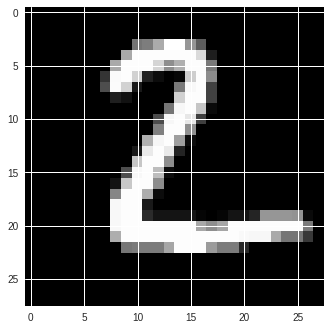

Model prediction: 2


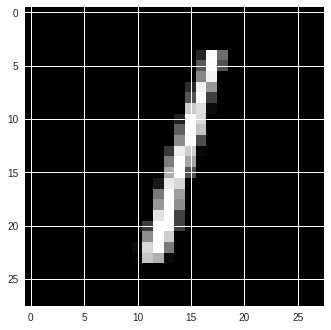

Model prediction: 1


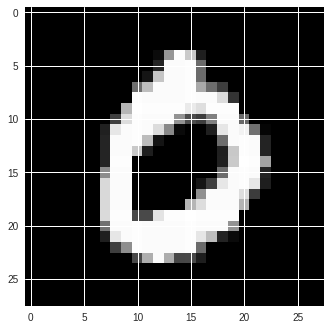

Model prediction: 0


In [31]:
# predict single images
n_images = 4

# get images from test set
test_images = mnist.test.images[:n_images]

# prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
x = {'images': test_images}, shuffle = False)

# use the model to predist the images class
preds = list(model.predict(input_fn))


# display
for i in range(n_images):
  plt.imshow(np.reshape(test_images[i], [28, 28]), cmap = 'gray')
  plt.show()
  print('Model prediction:', preds[i])